In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc

# Step 1: Initializing the SparkSession
spark = SparkSession.builder.getOrCreate()

# Step 2: Load and pre process the app data
app_data = spark.read.csv("dbfs:/FileStore/tables/export.csv", header=True, inferSchema=True)


In [0]:
df=app_data.select("Prefrence")
category_popularity=df.groupBy("Prefrence").agg(count("*").alias("popularity_score"))
popular_categories = category_popularity.orderBy(desc("popularity_score"))
display(popular_categories)

Prefrence,popularity_score
Games,3862
Entertainment,535
Education,453
Photo & Video,349
Utilities,248
Health & Fitness,180
Productivity,178
Social Networking,167
Lifestyle,144
Music,138


In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import mean
from pyspark.sql.functions import sum
from pyspark.ml.stat import ChiSquareTest




#Step 3: Grouping and Aggregating
downloads_ratings = app_data.select("Prefrence", "Rating (All)", "Avg Rating (All)")
downloads_mean = downloads_ratings.groupBy("Prefrence").agg(mean("Rating (All)").alias("mean_Download"))
ratings_mean = downloads_ratings.groupBy("Prefrence").agg(sum("Avg Rating (All)").alias("Avg Rating)_count"))
ratings_mean.show()
downloads_mean.show()

+-----------------+-----------------+
|        Prefrence|Avg Rating)_count|
+-----------------+-----------------+
|        Education|           1529.5|
|       Navigation|            123.5|
|    Entertainment|           1737.0|
|           Sports|            340.0|
|     Food & Drink|            200.5|
|    Photo & Video|           1326.5|
|           Travel|            273.5|
|          Finance|            253.0|
|Social Networking|            498.5|
|             Book|            277.5|
|         Shopping|            432.0|
|        Reference|            221.0|
| Health & Fitness|            666.0|
|        Utilities|            813.0|
|     Productivity|            713.0|
|            Games|          14231.5|
|            Music|            549.0|
|        Lifestyle|            404.0|
|         Business|            213.5|
|         Catalogs|             21.0|
+-----------------+-----------------+
only showing top 20 rows

+-----------------+------------------+
|        Prefrence|    

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

spark = SparkSession.builder.getOrCreate()
category_stats = app_data.groupBy("Prefrence").agg(avg("Rating (All)").alias("sum_Download"), avg("Avg Rating (All)").alias("avg_Avg Rating (All)"))

+-----------------+------------------+--------------------+
|        Prefrence|      sum_Download|avg_Avg Rating (All)|
+-----------------+------------------+--------------------+
|        Education|2239.2295805739514|   3.376379690949227|
|       Navigation| 11853.95652173913|  2.6847826086956523|
|    Entertainment| 7533.678504672897|  3.2467289719626167|
|           Sports|14026.929824561403|   2.982456140350877|
|     Food & Drink|13938.619047619048|  3.1825396825396823|
|    Photo & Video|14352.280802292264|  3.8008595988538683|
|           Travel|14129.444444444445|   3.376543209876543|
|          Finance|11047.653846153846|  2.4326923076923075|
|Social Networking| 45498.89820359281|  2.9850299401197606|
|             Book|         5125.4375|  2.4776785714285716|
|         Shopping| 18615.32786885246|   3.540983606557377|
|        Reference|       22410.84375|            3.453125|
| Health & Fitness| 9913.172222222222|                 3.7|
|        Utilities| 6863.822580645161|  

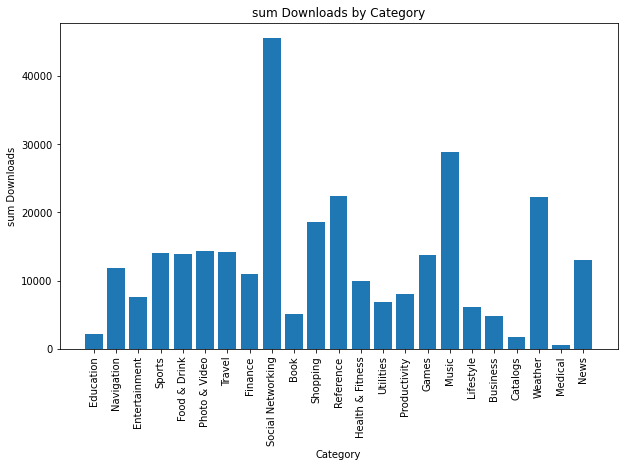

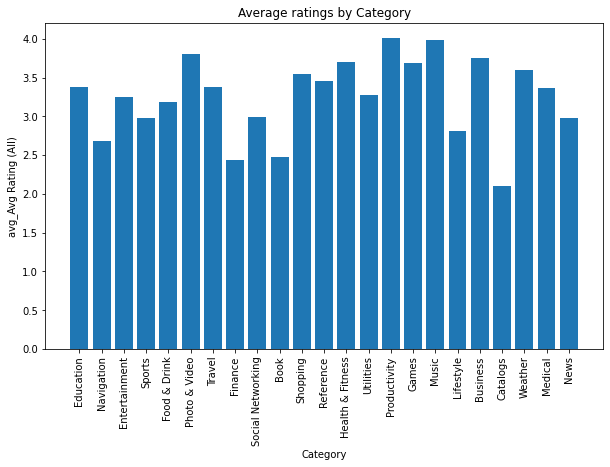

In [0]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for visualization
category_stats_pd = category_stats.toPandas()



category_stats = app_data.groupBy("Prefrence").agg(avg("Rating (All)").alias("sum_Download"), avg("Avg Rating (All)").alias("avg_Avg Rating (All)"))

category_stats.show()
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_stats_pd["Prefrence"], category_stats_pd["sum_Download"])
plt.xlabel("Category")
plt.ylabel("sum Downloads")
plt.title("sum Downloads by Category")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(category_stats_pd["Prefrence"], category_stats_pd["avg_Avg Rating (All)"])
plt.xlabel("Category")
plt.ylabel("avg_Avg Rating (All)")
plt.title("Average ratings by Category")
plt.xticks(rotation=90)
plt.show()

In [0]:
from pyspark.sql.functions import avg
# Group by the number of supporting devices and calculate average success rate
supporting_devices_impact = data.groupBy("Supp Devices").agg(avg("Avg Rating (All)").alias("avg_Avg Rating (All)"))
# Group by languages and calculate average success rate
languages_impact = df.groupBy("Supp Lang").agg(avg("Avg Rating (All)").alias("avg_Avg Rating (All)"))
# Group by screenshots and calculate average success rate
screenshots_impact = df.groupBy("Screenshot").agg(avg("Avg Rating (All)").alias("avg_Avg Rating (All)"))


In [0]:
screenshots_impact.show()

+----------+--------------------+
|Screenshot|avg_Avg Rating (All)|
+----------+--------------------+
|         1|  3.2451612903225806|
|         3|   3.194055944055944|
|         5|   3.814123917388408|
|         4|  3.4408450704225353|
|         2|  3.1153846153846154|
|         0|   2.785147801009373|
+----------+--------------------+



In [0]:
languages_impact.show()

+---------+--------------------+
|Supp Lang|avg_Avg Rating (All)|
+---------+--------------------+
|       31|  3.6320754716981134|
|       34|                 3.5|
|       28|              3.4375|
|       26|  4.2727272727272725|
|       27|   4.142857142857143|
|       12|   4.131284916201118|
|       22|            3.828125|
|       47|                 4.5|
|        1|  3.3762941332625434|
|       13|  4.0576923076923075|
|        6|  3.9545454545454546|
|       16|   3.960526315789474|
|        3|  3.5599078341013826|
|       20|   4.119047619047619|
|       40|                 4.5|
|       54|                3.75|
|        5|  3.8768115942028984|
|       19|                3.95|
|       41|                 3.5|
|       15|   4.261627906976744|
+---------+--------------------+
only showing top 20 rows



In [0]:
supporting_devices_impact.show()

+------------+--------------------+
|Supp Devices|avg_Avg Rating (All)|
+------------+--------------------+
|          26|  3.4642857142857144|
|          12|                 4.5|
|          47|  3.8653846153846154|
|          13|   3.642857142857143|
|          16|                 4.0|
|          40|  3.3056042031523645|
|          43|  3.7830188679245285|
|          15|                 4.5|
|          37|   3.551486362243334|
|           9|                 4.5|
|          35|              3.6875|
|          39|               4.125|
|          23|                 3.0|
|          45|                3.75|
|          38|  3.4877092050209204|
|          25|   3.708955223880597|
|          24|  3.8814814814814813|
|          11|   4.333333333333333|
|          33|                 4.0|
|          36|  3.2142857142857144|
+------------+--------------------+

